<a href="https://colab.research.google.com/github/JankoBascarevic/Masinsko-Ucenje/blob/main/NeuronskaMrezaTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("./sample_data/mnist_train_small.csv")

In [ ]:
from sklearn.model_selection import train_test_split
data = data.rename(columns={"6": "label"})
data.head()
print(data.shape)

train, test = train_test_split(data, test_size=0.2)

(19999, 785)


array([[<Axes: title={'center': 'label'}>]], dtype=object)

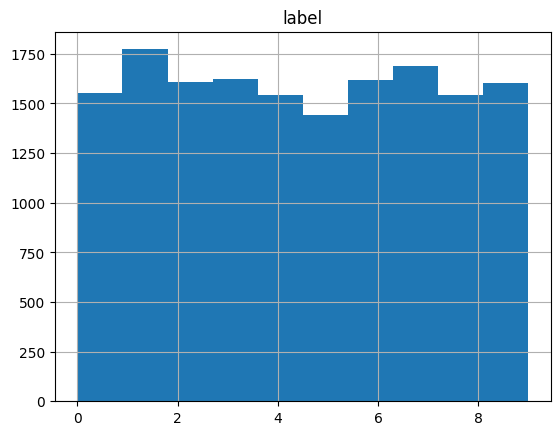

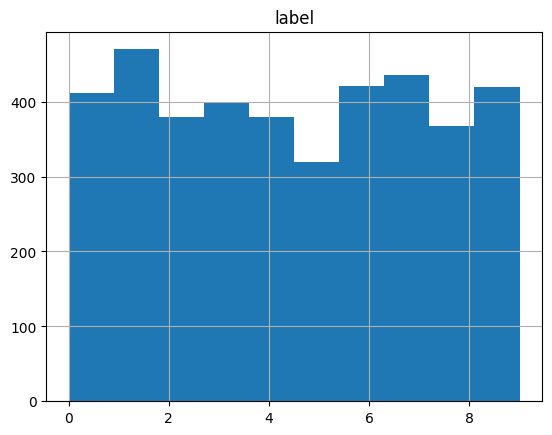

In [ ]:
train.hist(column='label')
test.hist(column="label")

In [ ]:
train = np.array(train)
test = np.array(test)

train = train.T

In [ ]:
y_train = train[0]
X_train = train[1:]
print(X_train.shape)
m = X_train.shape[1]
X_train = X_train / 255
print(y_train)

(784, 15999)
[1 6 8 ... 3 5 4]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(784, 100),
            nn.ReLU(),
            nn.Linear(100, 10),
            nn.Softmax()
        )

    def forward(self, x):
        return self.net(x)

    def predict(self, x):
        out = self.forward(x)
        out = torch.argmax(out, dim=1)
        return out

In [ ]:
import torch.nn.functional as F
def fit(X, y, model, epoch, loss_fn, opt):
    ohy = F.one_hot(y.to(torch.int64), 10).float()
    for i in range(epoch):
        loss = loss_fn(model.forward(X), ohy)
        loss.backward()
        opt.step()
        opt.zero_grad()
        # log performanse modela
        out = model.predict(X)
        print(out)
        print(y)
        acc = accuracy(out, y)
        print("Accuracy: ", acc)

def accuracy(pred, actual):
    s = torch.sum(pred == actual)
    return s.item() / len(actual)

In [ ]:
import torch.optim as optim
import torch.nn.functional as F
import torch
model = Model()
epochs = 100
lr = 1e-3
opt = optim.Adam(model.parameters(), lr=lr)
loss = F.cross_entropy

X = torch.from_numpy(X_train.T).float()
y = torch.from_numpy(y_train).long()
fit(X, y, model, epochs, loss, opt)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([9, 9, 9,  ..., 9, 0, 9])
tensor([1, 6, 8,  ..., 3, 5, 4])
Accuracy:  0.26589161822613916
tensor([1, 0, 9,  ..., 3, 0, 9])
tensor([1, 6, 8,  ..., 3, 5, 4])
Accuracy:  0.40240015000937557
tensor([1, 0, 8,  ..., 3, 0, 9])
tensor([1, 6, 8,  ..., 3, 5, 4])
Accuracy:  0.5209075567222952
tensor([1, 0, 8,  ..., 3, 3, 9])
tensor([1, 6, 8,  ..., 3, 5, 4])
Accuracy:  0.5795362210138134
tensor([1, 0, 8,  ..., 3, 3, 3])
tensor([1, 6, 8,  ..., 3, 5, 4])
Accuracy:  0.6103506469154322
tensor([1, 0, 8,  ..., 3, 3, 9])
tensor([1, 6, 8,  ..., 3, 5, 4])
Accuracy:  0.6331645727857991
tensor([1, 0, 8,  ..., 3, 3, 9])
tensor([1, 6, 8,  ..., 3, 5, 4])
Accuracy:  0.6467904244015251
tensor([1, 0, 8,  ..., 3, 3, 9])
tensor([1, 6, 8,  ..., 3, 5, 4])
Accuracy:  0.6546034127132946
tensor([1, 0, 8,  ..., 3, 3, 9])
tensor([1, 6, 8,  ..., 3, 5, 4])
Accuracy:  0.6577911119444966
tensor([1, 0, 8,  ..., 3, 3, 6])
tensor([1, 6, 8,  ..., 3, 5, 4])
Accuracy:  0.6600412525782862
tensor([1, 0, 8,  ..., 3, 3, 6])
tenso